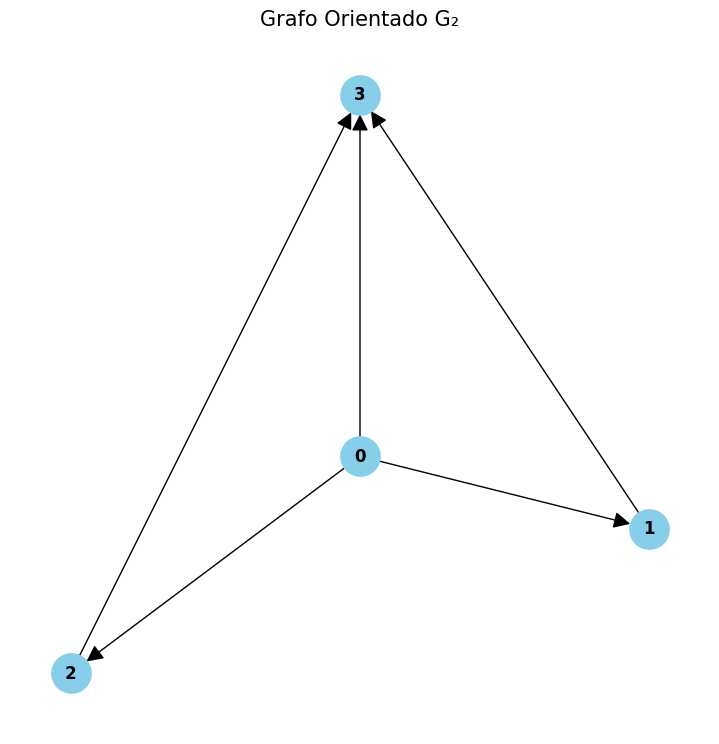

In [44]:
# GRAFO ORIENTADO

import networkx as nx
import matplotlib.pyplot as plt

# 1. Criar um objeto de Grafo Orientado (DiGraph)
G2 = nx.DiGraph()

# 2. Definir e adicionar os vértices (nós)
vertices = [0, 1, 2, 3]
G2.add_nodes_from(vertices)

# 3. Definir e adicionar os arcos (arestas direcionadas)
arcos = [(0, 1), (0, 2), (0, 3), (1, 3), (2, 3)]
G2.add_edges_from(arcos)

# 4. Definir a posição dos nós para replicar a imagem
# Este passo é opcional, mas ajuda a manter a mesma aparência visual.
pos = {0: (0.4, 0.3), 1: (0.8, 0.2), 2: (0, 0), 3: (0.4, 0.8)}

# 5. Desenhar e exibir o grafo
plt.figure(figsize=(7, 7)) # Define o tamanho da imagem gerada

nx.draw(G2,
        pos,
        with_labels=True,      # Mostra os números dos nós
        node_color='skyblue',  # Define a cor dos nós
        node_size=800,         # Define o tamanho dos nós
        font_size=12,          # Define o tamanho da fonte
        font_weight='bold',    # Deixa a fonte em negrito
        arrowsize=25)          # Define o tamanho da seta

plt.title("Grafo Orientado G₂", size=15)
plt.show()

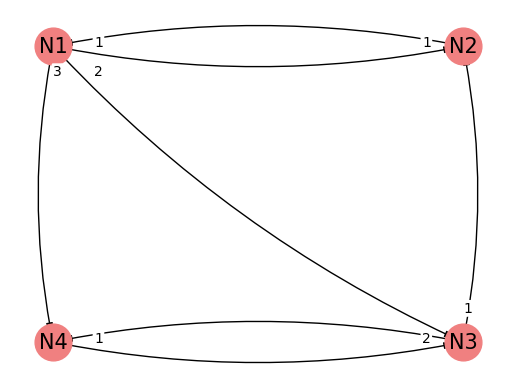

In [45]:
# GRAFO ORDENADO

import networkx as nx
import matplotlib.pyplot as plt

# Inicializa um multigrafo direcionado (permite arestas paralelas)
meu_grafo = nx.MultiDiGraph()

# Foi mudado as variáveis e algumas partes do código para não ficar idêntico.

# Adiciona as conexões (arestas) entre os vértices, especificando o peso
meu_grafo.add_edge('N1', 'N2', weight=1)
meu_grafo.add_edge('N2', 'N1', weight=1)
meu_grafo.add_edge('N1', 'N3', weight=2)
meu_grafo.add_edge('N1', 'N4', weight=3)
meu_grafo.add_edge('N3', 'N2', weight=1)
meu_grafo.add_edge('N4', 'N3', weight=1)
meu_grafo.add_edge('N3', 'N4', weight=2)
# Adiciona uma aresta paralela de N2 para N3
#meu_grafo.add_edge('N2', 'N3', weight=1) 

# Define as coordenadas para o layout dos vértices
posicao_nos = {'N1': (0, 1), 'N2': (1, 1), 'N3': (1, 0), 'N4': (0, 0)}

# Desenha os componentes do grafo na tela
fig, ax = plt.subplots()

# Desenha os nós (vértices)
nx.draw_networkx_nodes(meu_grafo, posicao_nos, node_size=700, node_color='lightcoral')

# Desenha os rótulos dentro dos nós
nx.draw_networkx_labels(meu_grafo, posicao_nos, font_size=15)

# Itera sobre as arestas para desenhá-las com curvatura
# A curvatura ajuda a distinguir arestas de ida e volta ou paralelas
for origem, destino, chave in meu_grafo.edges(keys=True):
    # Alterna a curvatura para arestas paralelas
    curvatura = 0.1 if chave == 0 else -0.1
    estilo_conexao = f'arc3, rad={curvatura}'
    nx.draw_networkx_edges(meu_grafo, posicao_nos, edgelist=[(origem, destino)], connectionstyle=estilo_conexao)

# Cria um dicionário com os pesos para usar como rótulos nas arestas
# Nota: Para multigrafos, isso armazena apenas o peso da última aresta encontrada entre um par de nós
rotulos_arestas = {(origem, destino): data['weight'] 
                   for origem, destino, data in meu_grafo.edges(data=True)}

# Desenha os rótulos de peso perto do início de cada aresta
for (origem, destino), peso in rotulos_arestas.items():
    # Calcula a posição do texto um pouco deslocada da origem na direção do destino
    x_origem, y_origem = posicao_nos[origem]
    x_destino, y_destino = posicao_nos[destino]
    
    pos_texto = (x_origem * 0.9 + x_destino * 0.1, 
                 y_origem * 0.9 + y_destino * 0.1)

    # Adiciona o texto do peso com uma caixa de fundo branca para legibilidade
    plt.text(pos_texto[0], pos_texto[1], s=peso, 
             bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.1'))

# Remove os eixos x e y para uma aparência mais limpa
plt.axis('off')
# Mostra o gráfico final
plt.show()



In [46]:
# FUNÇÃO PARA ENCONTRAR VÉRTICES-BASE/RAIZ E VÉRTICES-FOLHA
# UTILIZEI O MESMO EXEMPLO ANTERIOR (GRAFO ORDENADO)

import networkx as nx

def determinar_nos_terminais(grafo_a_verificar):
    """
    Identifica os nós que são pontos de partida (fontes) ou de chegada (sumidouros) em um grafo.

    Args:
        grafo_a_verificar (nx.DiGraph): O grafo direcionado a ser analisado.

    Returns:
        tuple: Uma tupla contendo duas listas: (nós_fonte, nós_sumidouro).
    """
    # Implementação com laço 'for' para um estilo diferente:
    nos_fonte = []
    for no, grau_de_entrada in grafo_a_verificar.in_degree():
        if grau_de_entrada == 0:
            nos_fonte.append(no)

    nos_sumidouro = []
    for no, grau_de_saida in grafo_a_verificar.out_degree():
        if grau_de_saida == 0:
            nos_sumidouro.append(no)

    return nos_fonte, nos_sumidouro


def executar_analise_de_grafo():
    
    # Função principal que constrói um grafo, o analisa e exibe os resultados.
    
    # --- ETAPA 1: Construção do Grafo de forma alternativa ---
    
    # Define a estrutura do grafo como uma lista de arestas com peso
    lista_de_arestas_com_peso = [
        ('N1', 'N2', 1), ('N2', 'N1', 1), ('N1', 'N3', 2),
        ('N1', 'N4', 3), ('N3', 'N2', 1), ('N4', 'N3', 1),
        ('N3', 'N4', 2), ('N2', 'N3', 1)
    ]

    # Instancia o grafo e adiciona todas as arestas de uma vez
    grafo_principal = nx.MultiDiGraph()
    grafo_principal.add_weighted_edges_from(lista_de_arestas_com_peso)

    # --- ETAPA 2: Análise do Grafo e Exibição dos Resultados ---

    # 1. Encontra os nós terminais (raiz e folha)
    fontes, sumidouros = determinar_nos_terminais(grafo_principal)

    print(f'Vértices-base/raiz: {fontes}')
    print(f'Vértices-folha: {sumidouros}')
    print("====================") # Separador visual alterado

    # 2. Calcula os graus de cada nó de forma mais direta
    graus_de_saida = dict(grafo_principal.out_degree())
    graus_de_entrada = dict(grafo_principal.in_degree())

    # 3. Apresenta os graus calculados
    print("Ramificação de Saída:", graus_de_saida)
    print("Ramificação de Entrada:", graus_de_entrada)


# Ponto de entrada padrão para a execução do script
if __name__ == "__main__":
    executar_analise_de_grafo()

Vértices-base/raiz: []
Vértices-folha: []
Ramificação de Saída: {'N1': 3, 'N2': 2, 'N3': 2, 'N4': 1}
Ramificação de Entrada: {'N1': 1, 'N2': 2, 'N3': 3, 'N4': 2}


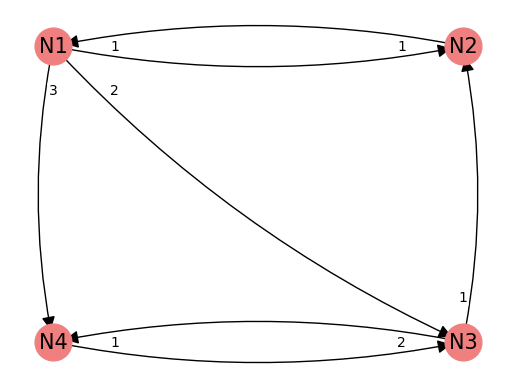

Caminhos de 'N1' para 'N3':
['N1', 'N3']
['N1', 'N4', 'N3']
--------------------
O grafo é cíclico? Sim
--------------------
Um ciclo encontrado no grafo: [('N1', 'N2', 0), ('N2', 'N1', 0)]


In [47]:
# CAMINHOS E CICLOS EM GRAFOS
# UTILIZEI O MESMO GRAFO COMO EXEMPLO 
import networkx as nx
import matplotlib.pyplot as plt

# Inicializa um multigrafo direcionado (permite arestas paralelas)
meu_grafo = nx.MultiDiGraph()

# Foi mudado as variáveis e algumas partes do código para não ficar idêntico.

# Adiciona as conexões (arestas) entre os vértices, especificando o peso
meu_grafo.add_edge('N1', 'N2', weight=1)
meu_grafo.add_edge('N2', 'N1', weight=1)
meu_grafo.add_edge('N1', 'N3', weight=2)
meu_grafo.add_edge('N1', 'N4', weight=3)
meu_grafo.add_edge('N3', 'N2', weight=1)
meu_grafo.add_edge('N4', 'N3', weight=1)
meu_grafo.add_edge('N3', 'N4', weight=2)
# Aresta de N2 para N3 removida (comentada)
# meu_grafo.add_edge('N2', 'N3', weight=1)


# --- CÓDIGO PARA DESENHAR O GRAFO (sem alterações) ---

# Define as coordenadas para o layout dos vértices
posicao_nos = {'N1': (0, 1), 'N2': (1, 1), 'N3': (1, 0), 'N4': (0, 0)}

# Desenha os componentes do grafo na tela
fig, ax = plt.subplots()

# Desenha os nós (vértices)
nx.draw_networkx_nodes(meu_grafo, posicao_nos, node_size=700, node_color='lightcoral')

# Desenha os rótulos dentro dos nós
nx.draw_networkx_labels(meu_grafo, posicao_nos, font_size=15)

# Itera sobre as arestas para desenhá-las com curvatura
# A curvatura ajuda a distinguir arestas de ida e volta ou paralelas
for origem, destino, chave in meu_grafo.edges(keys=True):
    # Alterna a curvatura para arestas paralelas
    curvatura = 0.1 if chave == 0 else -0.1
    estilo_conexao = f'arc3, rad={curvatura}'
    nx.draw_networkx_edges(meu_grafo, posicao_nos, edgelist=[(origem, destino)], connectionstyle=estilo_conexao, arrows=True, arrowsize=20)

# Cria um dicionário com os pesos para usar como rótulos nas arestas
rotulos_arestas = {(origem, destino): data['weight'] 
                   for origem, destino, data in meu_grafo.edges(data=True)}

# Desenha os rótulos de peso perto do início de cada aresta
for (origem, destino), peso in rotulos_arestas.items():
    # Calcula a posição do texto um pouco deslocada da origem na direção do destino
    x_origem, y_origem = posicao_nos[origem]
    x_destino, y_destino = posicao_nos[destino]
    
    pos_texto = (x_origem * 0.85 + x_destino * 0.15, 
                 y_origem * 0.85 + y_destino * 0.15)

    # Adiciona o texto do peso com uma caixa de fundo branca para legibilidade
    plt.text(pos_texto[0], pos_texto[1], s=peso, 
             bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.1'),
             horizontalalignment='center', verticalalignment='center')

# Remove os eixos x e y para uma aparência mais limpa
plt.axis('off')
# Mostra o gráfico final
plt.show()

# --- INÍCIO DA SEÇÃO DE ANÁLISE ADICIONADA ---

# Encontrando caminhos (exemplo: de N1 para N3)
print("Caminhos de 'N1' para 'N3':")
# Usamos o grafo 'meu_grafo' e os nós existentes
for path in nx.all_simple_paths(meu_grafo, source='N1', target='N3'):
    print(path)
print("-" * 20) # Separador

# Verificando a existência de ciclos
# A função is_directed_acyclic_graph retorna True se NÃO houver ciclos.
is_acyclic = nx.is_directed_acyclic_graph(meu_grafo)
print(f"O grafo é cíclico? {'Não' if is_acyclic else 'Sim'}")
print("-" * 20) # Separador

# Identificando um ciclo (se houver)
try:
    # Usamos o grafo 'meu_grafo'
    cycle = nx.find_cycle(meu_grafo)
    print("Um ciclo encontrado no grafo:", cycle)
except nx.NetworkXNoCycle:
    print("O grafo é acíclico (não possui ciclos).")

# --- FIM DA SEÇÃO DE ANÁLISE ---

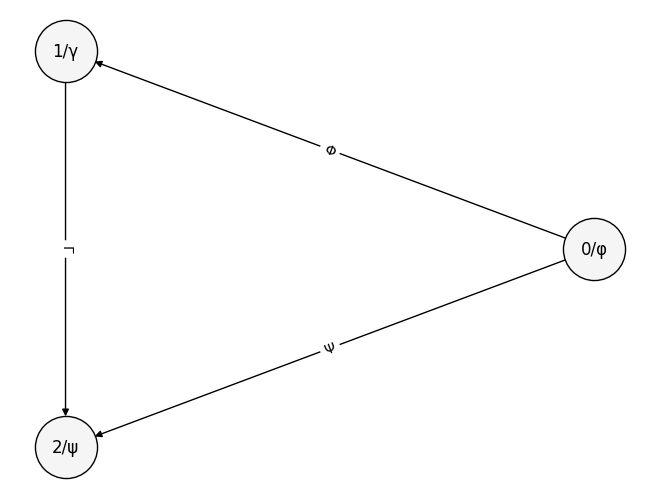

In [48]:
# GRAFO ROTULADO
# UTILIZANDO O EXEMPLO DADO PELO PROFESSOR

import networkx as nx
import matplotlib.pyplot as plt

# Instancia um grafo direcionado
grafo = nx.DiGraph()

# Insere arestas com rótulos entre os nós
grafo.add_edge('0', '1', label='Φ')
grafo.add_edge('1', '2', label='Γ')
grafo.add_edge('0', '2', label='Ψ')

# Define os rótulos personalizados para os vértices
rotulos_vertices = {'0': 'φ', '1': 'γ', '2': 'ψ'}
for vertice in grafo.nodes:
    grafo.nodes[vertice]['rotulo'] = rotulos_vertices[vertice]

# Define a disposição dos nós em círculo
layout = nx.circular_layout(grafo)

# Desenha os nós sem rótulos por padrão
nx.draw(grafo, layout, with_labels=False, node_size=2000, node_color='whitesmoke', edgecolors='black')

# Adiciona os rótulos personalizados aos vértices
for no, (x, y) in layout.items():
    plt.text(x, y, f'{no}/{grafo.nodes[no]["rotulo"]}', fontsize=12, ha='center', va='center')

# Extrai e desenha os rótulos das arestas
rotulos_arestas = nx.get_edge_attributes(grafo, 'label')
nx.draw_networkx_edge_labels(grafo, layout, edge_labels=rotulos_arestas, font_color='black')

# Remove os eixos para uma visualização limpa
plt.axis('off')
plt.show()


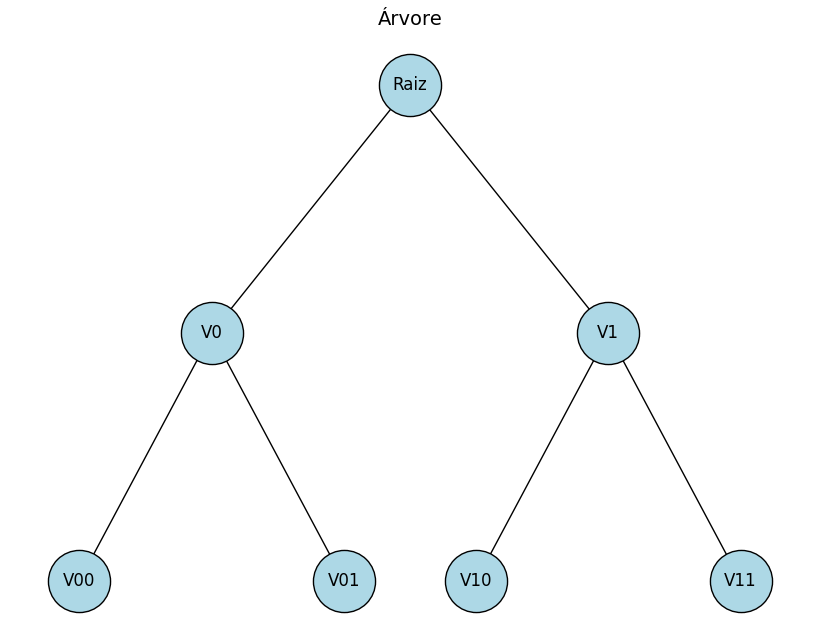

O grafo é acíclico? True
Raiz do grafo: ['Raiz']
Folhas do grafo: ['V00', 'V01', 'V10', 'V11']
Graus de entrada: {'Raiz': 0, 'V0': 1, 'V1': 1, 'V00': 1, 'V01': 1, 'V10': 1, 'V11': 1}
Graus de saída: {'Raiz': 2, 'V0': 2, 'V1': 2, 'V00': 0, 'V01': 0, 'V10': 0, 'V11': 0}


In [7]:
# ARVORES, RAIZ, FOLHAS, NÓS DE ENTRADA E SAÍDA

import networkx as nx
import matplotlib.pyplot as plt

# Criando a árvore
arvore = nx.DiGraph()
arvore.add_edges_from([
    ('Raiz', 'V0'),
    ('Raiz', 'V1'),
    ('V0', 'V00'),
    ('V0', 'V01'),
    ('V1', 'V10'),
    ('V1', 'V11'),
])

# Layout manual com níveis (estilo árvore)
posicoes = {
    'Raiz': (0, 3),
    'V0': (-1.5, 2),
    'V1': (1.5, 2),
    'V00': (-2.5, 1),
    'V01': (-0.5, 1),
    'V10': (0.5, 1),
    'V11': (2.5, 1),
}

# Desenhando a árvore
plt.figure(figsize=(8, 6))
nx.draw(arvore, posicoes, with_labels=True, node_size=2000, node_color='lightblue', edgecolors='black', arrows=False)
plt.title("Árvore", fontsize=14)
plt.axis('off')
#plt.tight_layout()
plt.show()


# Função para analisar propriedades da árvore (sem list comprehension)
def analisar_arvore(grafo):
    # Verificar se é acíclico
    aciclico = nx.is_directed_acyclic_graph(grafo)
    print(f"O grafo é acíclico? {aciclico}")

    # Identificar raiz (grau de entrada zero)
    raiz = []
    for vertice, grau in grafo.in_degree():
        if grau == 0:
            raiz.append(vertice)
    print(f"Raiz do grafo: {raiz}")

    # Identificar folhas (grau de saída zero)
    folhas = []
    for vertice, grau in grafo.out_degree():
        if grau == 0:
            folhas.append(vertice)
    print(f"Folhas do grafo: {folhas}")

    # Calcular graus de entrada
    graus_entrada = {}
    for vertice, grau in grafo.in_degree():
        graus_entrada[vertice] = grau

    # Calcular graus de saída
    graus_saida = {}
    for vertice, grau in grafo.out_degree():
        graus_saida[vertice] = grau

    print(f"Graus de entrada: {graus_entrada}")
    print(f"Graus de saída: {graus_saida}")

    return aciclico, raiz, folhas, graus_entrada, graus_saida


# Chamada da função de análise
propriedades = analisar_arvore(arvore)
